# Excel a SHP

In [1]:
import os
# Import Libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
Ruta = r"E:\Python\02_SIG_Python\Datos_Espacial\Excel"

In [3]:
type(Ruta)

str

In [4]:
os.chdir(Ruta)

In [5]:
excel = pd.read_excel("COORDENADAS.xlsx")

In [6]:
type(excel)

pandas.core.frame.DataFrame

In [8]:
len(excel)

29

In [12]:
list(excel.columns)

['ID', 'ESTE', 'NORTE ', 'Sexo', 'Edad', 'Zona']

In [10]:
excel.head(3)

,ID,ESTE,NORTE,Sexo,Edad,Zona
0,1,305448,8926668,F,14,18S
1,2,305123,8925261,M,12,18S
2,3,304554,8925426,F,15,18S


In [13]:
excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      29 non-null     int64 
 1   ESTE    29 non-null     int64 
 2   NORTE   29 non-null     int64 
 3   Sexo    29 non-null     object
 4   Edad    29 non-null     int64 
 5   Zona    29 non-null     object
dtypes: int64(4), object(2)
memory usage: 1.5+ KB


In [14]:
# Estadistica datos
excel.describe()

,ID,ESTE,NORTE,Edad
count,29.000000,29.000000,2.900000e+01,29.000000
mean,15.000000,304813.724138,8.925399e+06,30.000000
std,8.514693,275.133850,3.862645e+02,14.045843
min,1.000000,304439.000000,8.924616e+06,12.000000
25%,8.000000,304642.000000,8.925224e+06,24.000000
50%,15.000000,304779.000000,8.925349e+06,25.000000
75%,22.000000,305088.000000,8.925500e+06,32.000000
max,29.000000,305448.000000,8.926668e+06,65.000000


In [16]:
# Nombre de los campos
excel.columns 

Index(['ID', 'ESTE', 'NORTE ', 'Sexo', 'Edad', 'Zona'], dtype='object')

In [17]:
# Eliminar espacios en nombres campos
excel.columns  = excel.columns.str.strip()

In [18]:
excel.columns

Index(['ID', 'ESTE', 'NORTE', 'Sexo', 'Edad', 'Zona'], dtype='object')

In [19]:
# Create point geometries
geometria = gpd.points_from_xy(excel['ESTE'],excel['NORTE'], crs=32718)

In [21]:
datos_shp = gpd.GeoDataFrame(excel, geometry=geometria)

In [22]:
datos_shp.head(3)

,ID,ESTE,NORTE,Sexo,Edad,Zona,geometry
0,1,305448,8926668,F,14,18S,POINT (305448.000 8926668.000)
1,2,305123,8925261,M,12,18S,POINT (305123.000 8925261.000)
2,3,304554,8925426,F,15,18S,POINT (304554.000 8925426.000)


In [23]:
print(datos_shp.crs)

epsg:32718


In [24]:
# Import CRS class from pyproj
from pyproj import CRS

In [25]:
# Conocer sobre la Codigo 32718
crs_utm = CRS.from_user_input(32718)
crs_utm

<Derived Projected CRS: EPSG:32718>
Name: WGS 84 / UTM zone 18S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 78°W and 72°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Brazil. Chile. Colombia. Ecuador. Peru.
- bounds: (-78.0, -80.0, -72.0, 0.0)
Coordinate Operation:
- name: UTM zone 18S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [27]:
# Exportacion del shp 
datos_shp.to_file('Puntos_utm.shp')

In [28]:
#datos_shp.to_file?

In [22]:
print(datos_shp.crs)

epsg:32718


In [29]:
# Reproyectar a Geografico
shp_GEO = datos_shp.to_crs(epsg=4326)

In [30]:
shp_GEO.head(3)

,ID,ESTE,NORTE,Sexo,Edad,Zona,geometry
0,1,305448,8926668,F,14,18S,POINT (-76.77334 -9.70525)
1,2,305123,8925261,M,12,18S,POINT (-76.77637 -9.71796)
2,3,304554,8925426,F,15,18S,POINT (-76.78154 -9.71644)


In [31]:
Longitud = shp_GEO.geometry.x
Latitud = shp_GEO.geometry.y

In [33]:
shp_GEO["Longitud"] = Longitud
shp_GEO["Latitud"] = Latitud

In [34]:
shp_GEO.head(3)

,ID,ESTE,NORTE,Sexo,Edad,Zona,geometry,Longitud,Latitud
0,1,305448,8926668,F,14,18S,POINT (-76.77334 -9.70525),-76.773338,-9.705251
1,2,305123,8925261,M,12,18S,POINT (-76.77637 -9.71796),-76.776367,-9.717956
2,3,304554,8925426,F,15,18S,POINT (-76.78154 -9.71644),-76.781544,-9.716437


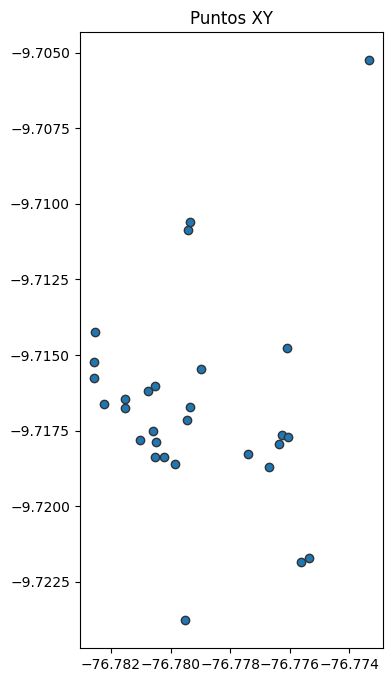

In [35]:
shp_GEO.plot(edgecolor="0.2", figsize=(10, 8))
plt.title("Puntos XY");

In [36]:
shp_GEO.to_file('puntos_Geo.shp')

In [37]:
shp_GEO.head(5)

,ID,ESTE,NORTE,Sexo,Edad,Zona,geometry,Longitud,Latitud
0,1,305448,8926668,F,14,18S,POINT (-76.77334 -9.70525),-76.773338,-9.705251
1,2,305123,8925261,M,12,18S,POINT (-76.77637 -9.71796),-76.776367,-9.717956
2,3,304554,8925426,F,15,18S,POINT (-76.78154 -9.71644),-76.781544,-9.716437
3,4,304670,8925269,F,18,18S,POINT (-76.78049 -9.71786),-76.780494,-9.717862
4,5,304668,8925213,F,25,18S,POINT (-76.78052 -9.71837),-76.780515,-9.718368
